<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

!pip install squarify
import squarify 

!pip install adjustText 
from adjustText import adjust_text

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('default')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Upload Files

### Camden Comparison

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CompReports.csv", "comps")

('comps', <http.client.HTTPMessage at 0x7f21986f2d30>)

In [3]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'comps', 'sample_data']

In [4]:
comps=pd.read_csv('comps')

### Rutgers Comparison

In [5]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CampCompReports.csv", "campcomps")

('campcomps', <http.client.HTTPMessage at 0x7f21986f2c10>)

In [6]:
campcomps=pd.read_csv('campcomps')

### Program Pipeline

In [7]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/ProgramDetails.csv", "programs")

('programs', <http.client.HTTPMessage at 0x7f21986f5490>)

In [8]:
programs=pd.read_csv('programs')

### Year Over Year Data

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/YoYCompReports.csv", "yoy")

('yoy', <http.client.HTTPMessage at 0x7f21697c1a60>)

In [10]:
yoy=pd.read_csv('yoy')

### Fall 2023 Application Data

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Fall23AppData.csv", "fallapps")

('fallapps', <http.client.HTTPMessage at 0x7f21697c1850>)

In [12]:
fall=pd.read_csv('fallapps')

## Dashboard

### Pipelie: Year over Year Comparison

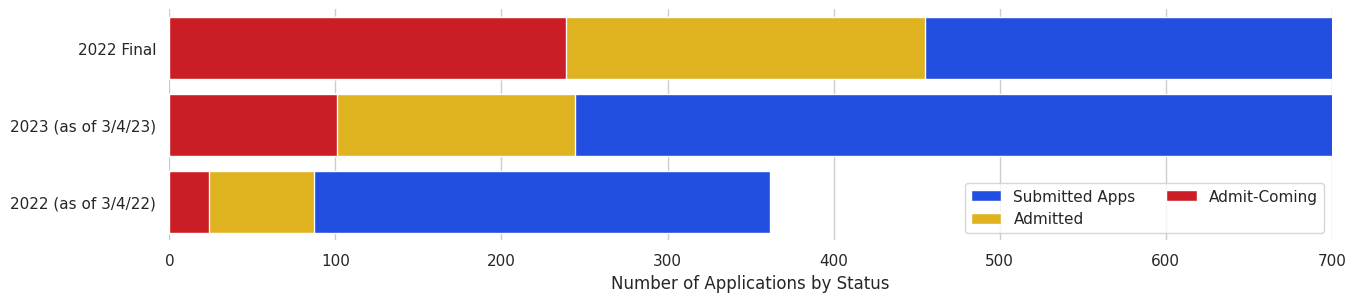

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 3))

# Plot the total apps
sns.set_color_codes("bright")
sns.barplot(x="Submitted", y="Year", data=yoy,
            label="Submitted Apps", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("bright")
sns.barplot(x="Admitted", y="Year", data=yoy,
            label="Admitted", color="y")

# Plot the crashes where alcohol was involved
sns.set_color_codes("bright")
sns.barplot(x="Admit-Coming", y="Year", data=yoy,
            label="Admit-Coming", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700), ylabel="",
       xlabel="Number of Applications by Status")
sns.despine(left=True, bottom=True);

### Pipeline: Breakdown by Program

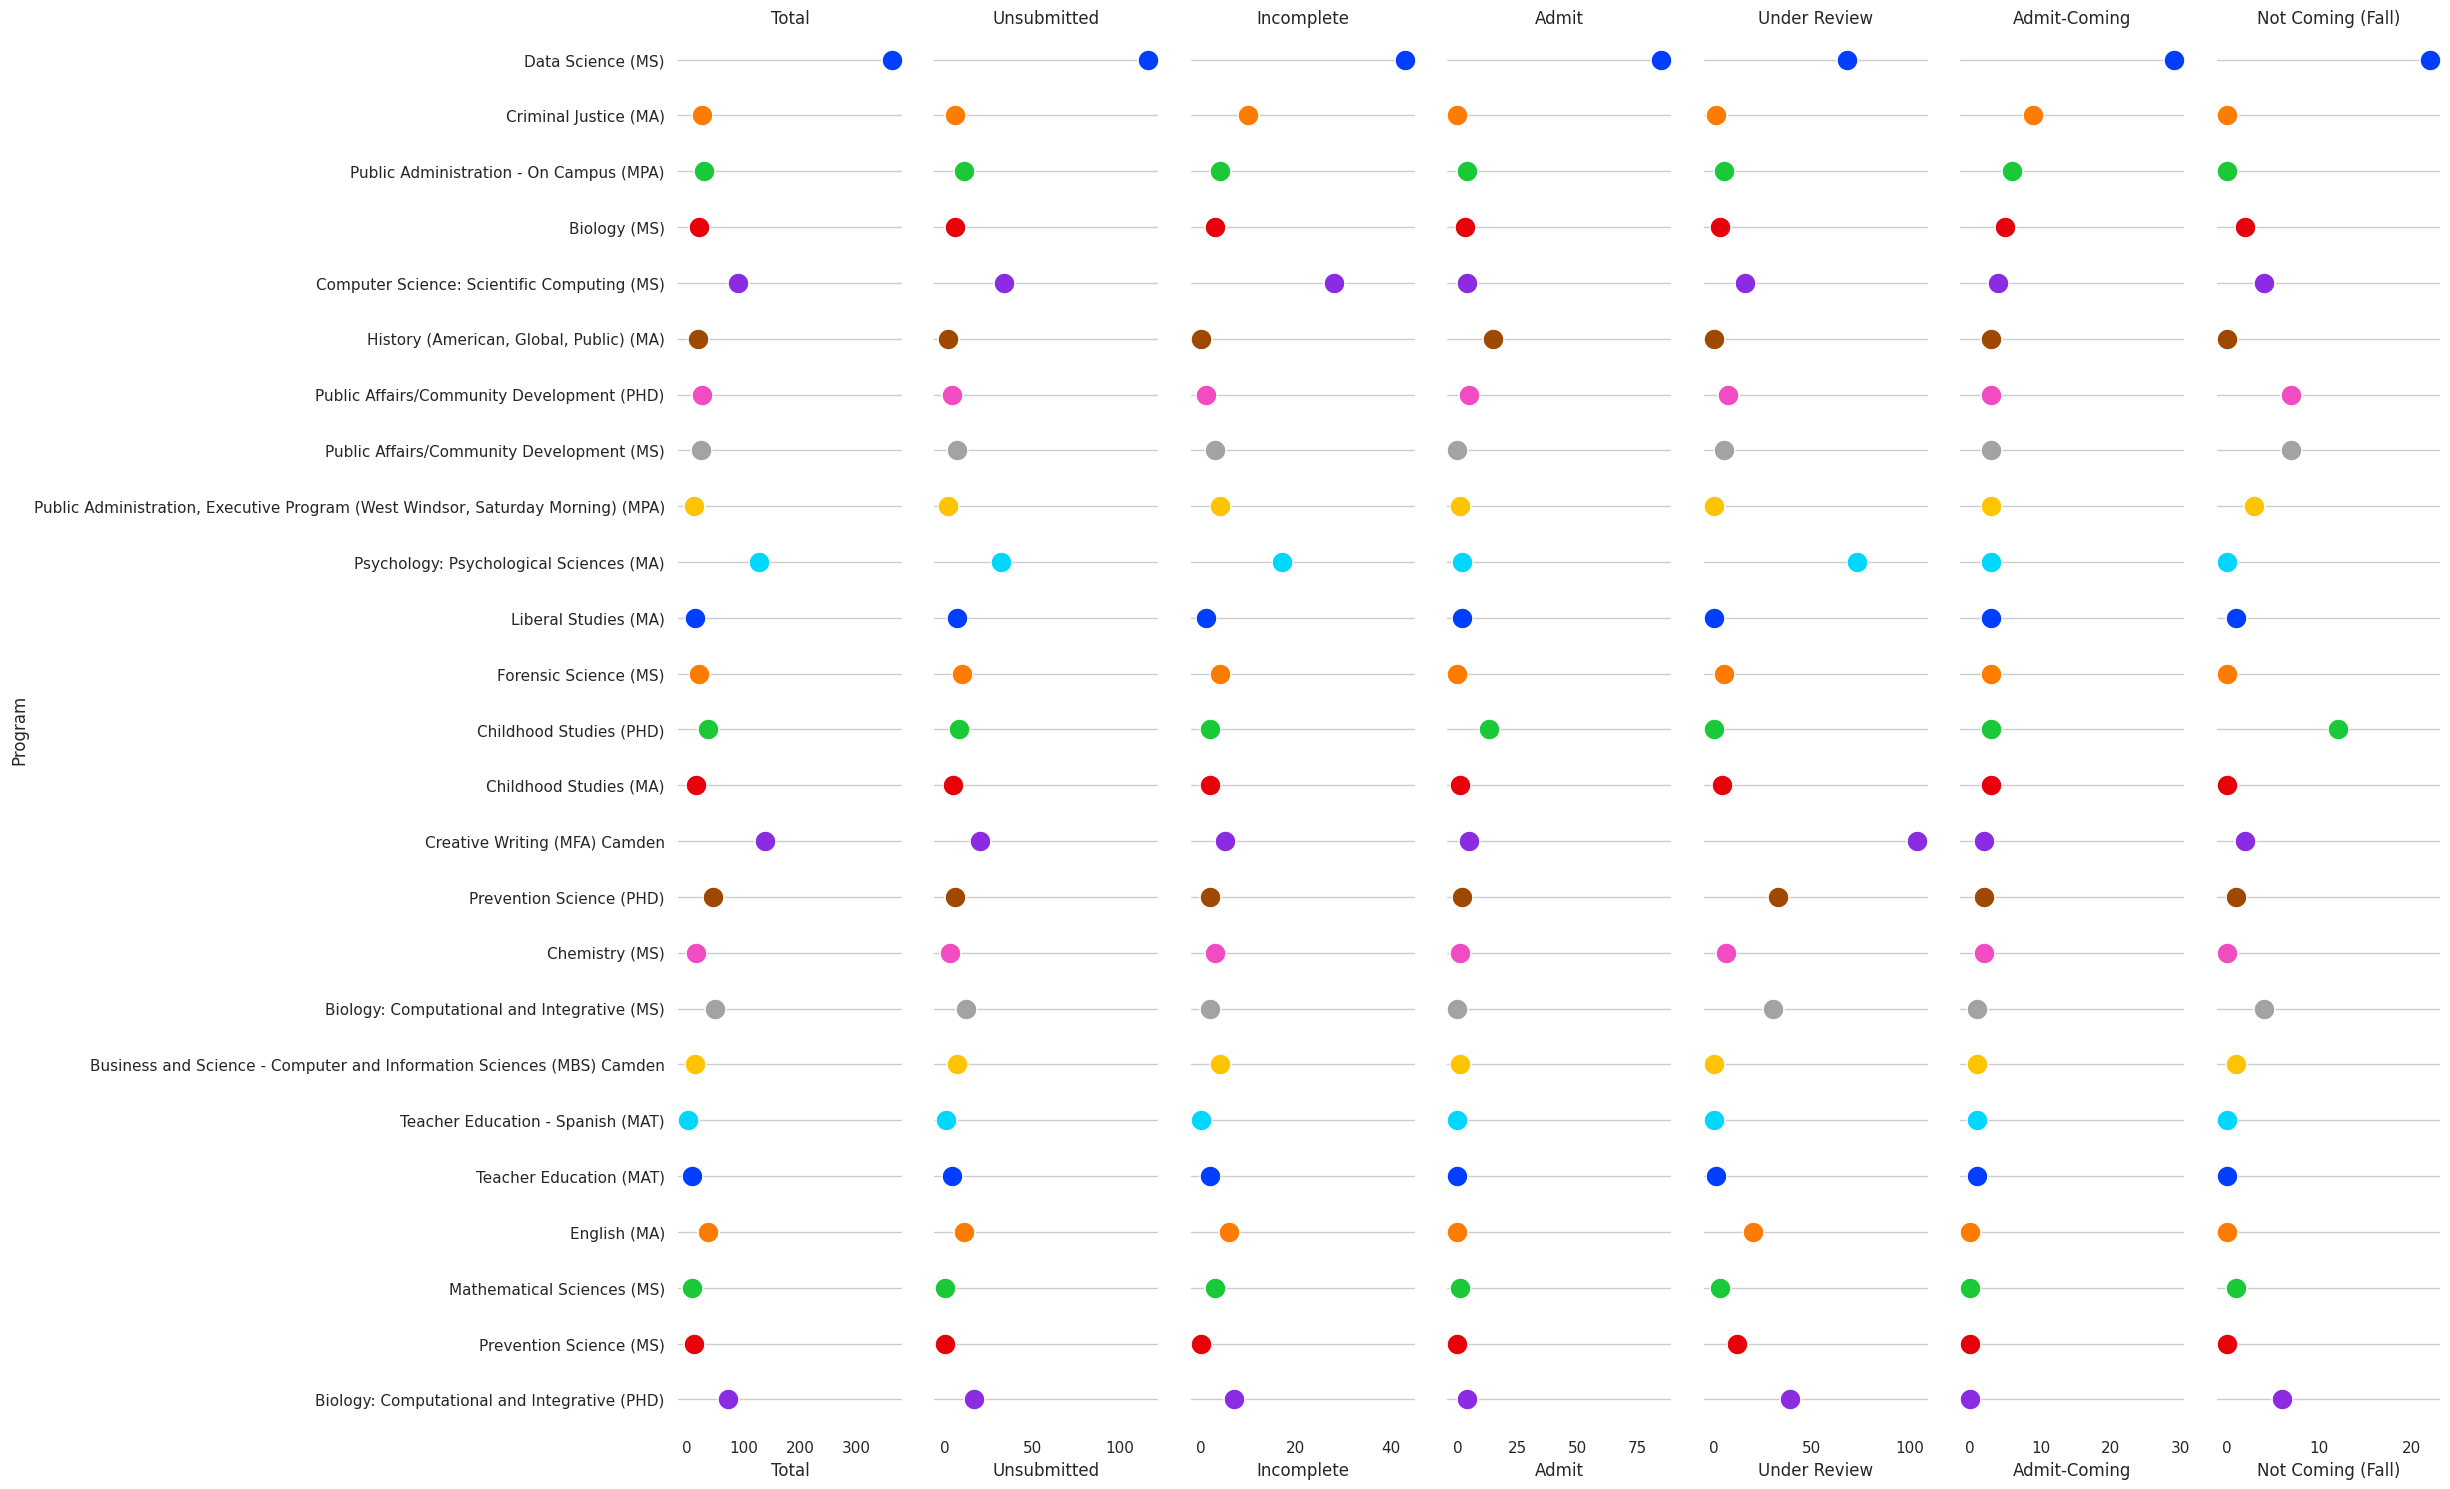

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(programs.sort_values("Admit-Coming", ascending=False),
                 x_vars=programs.columns[:-1], y_vars=["Program"],
                 height=15, aspect=.18)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h", jitter=False,
      palette="bright", linewidth=1, edgecolor="w")

# Use semantically meaningful titles for the columns
titles = ['Total','Unsubmitted', 'Incomplete', 'Admit', 'Under Review',
       'Admit-Coming', 'Not Coming (Fall)']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True);

### Accepted Application Analysis Across Camden

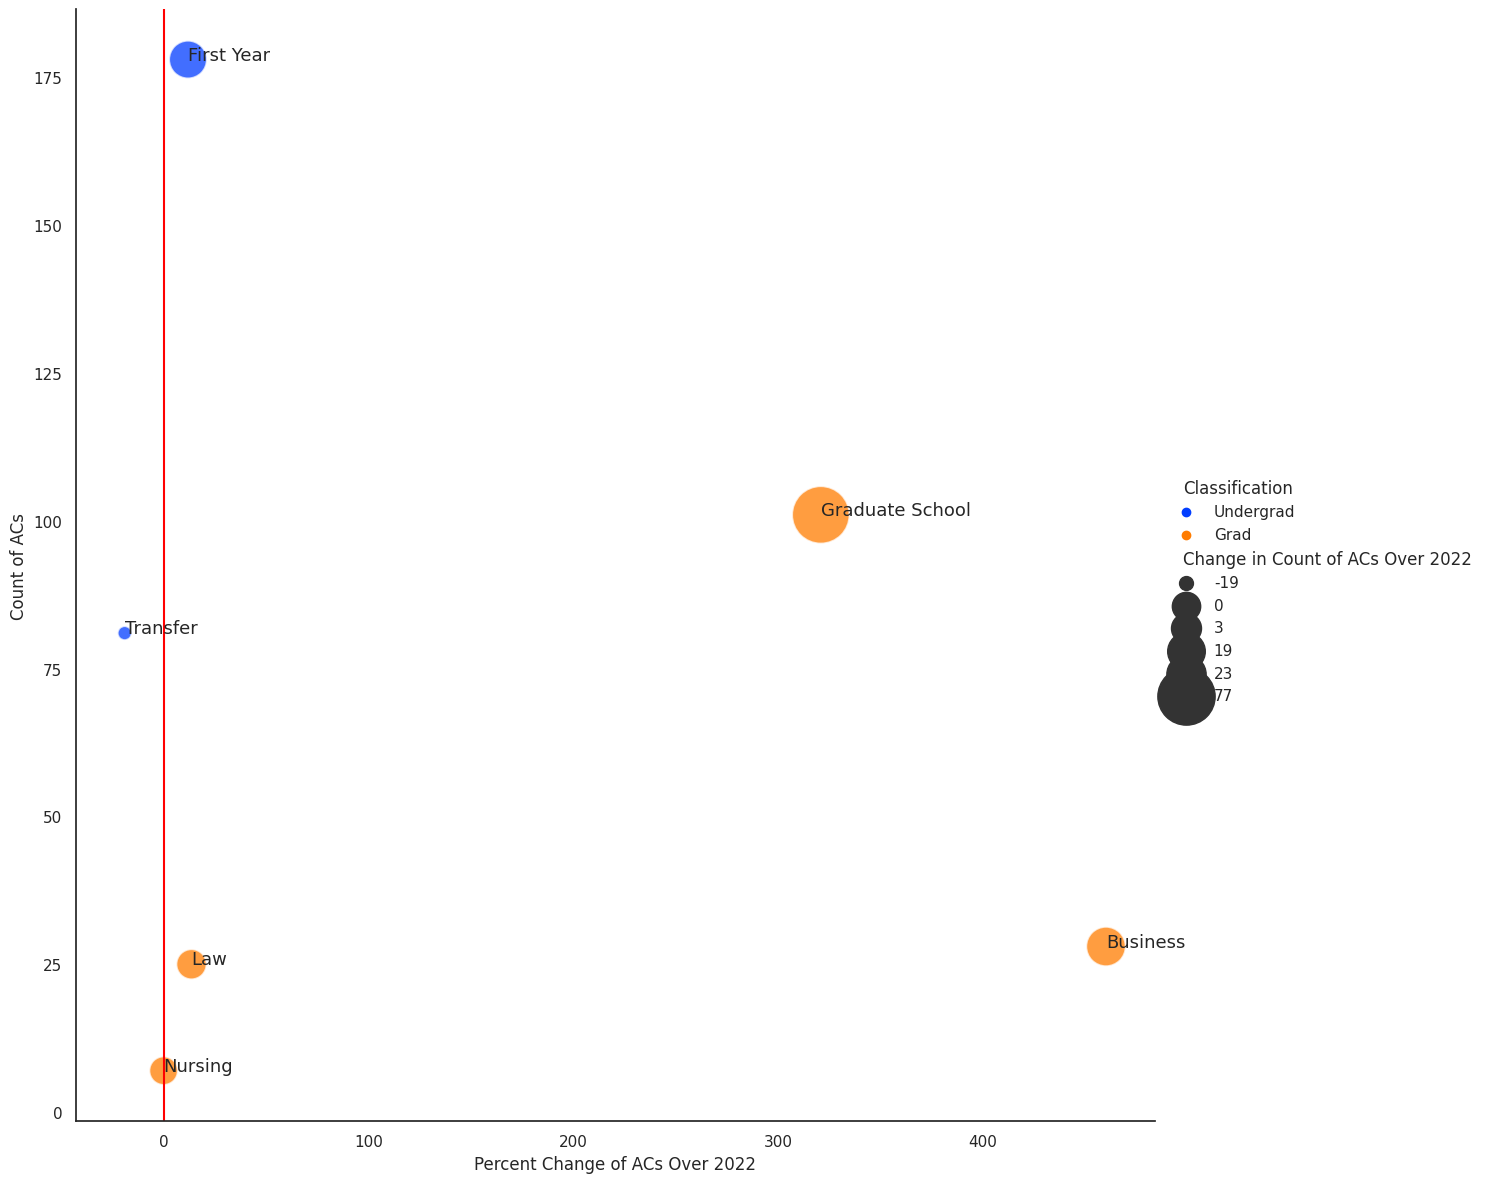

In [14]:
from numpy.ma.core import compress
import seaborn as sns
sns.set_theme(style="white")

# Plot miles 
sns.relplot(y="Count of ACs", x="Percent Change of ACs Over 2022", 
            hue="Classification", size="Change in Count of ACs Over 2022",
            sizes=(100, 1700), alpha=.75,palette="bright",
            height=12, data=comps)
plt.axvline(x = 0, color = 'red',)

texts = [plt.text(comps['Percent Change of ACs Over 2022'][i],
                  comps['Count of ACs'][i], comps['Category'][i],fontsize=13) 
for i in range(len(comps))]


In [ ]:
campcomps.dtypes

Index                                 int64
School                               object
Count of Acs                          int64
Percent Change of ACs Over 2022     float64
Change in Count of Acs Over 2022      int64
Campus                               object
dtype: object

### Accepted Application Analysis Across Campuses (Grad Only)

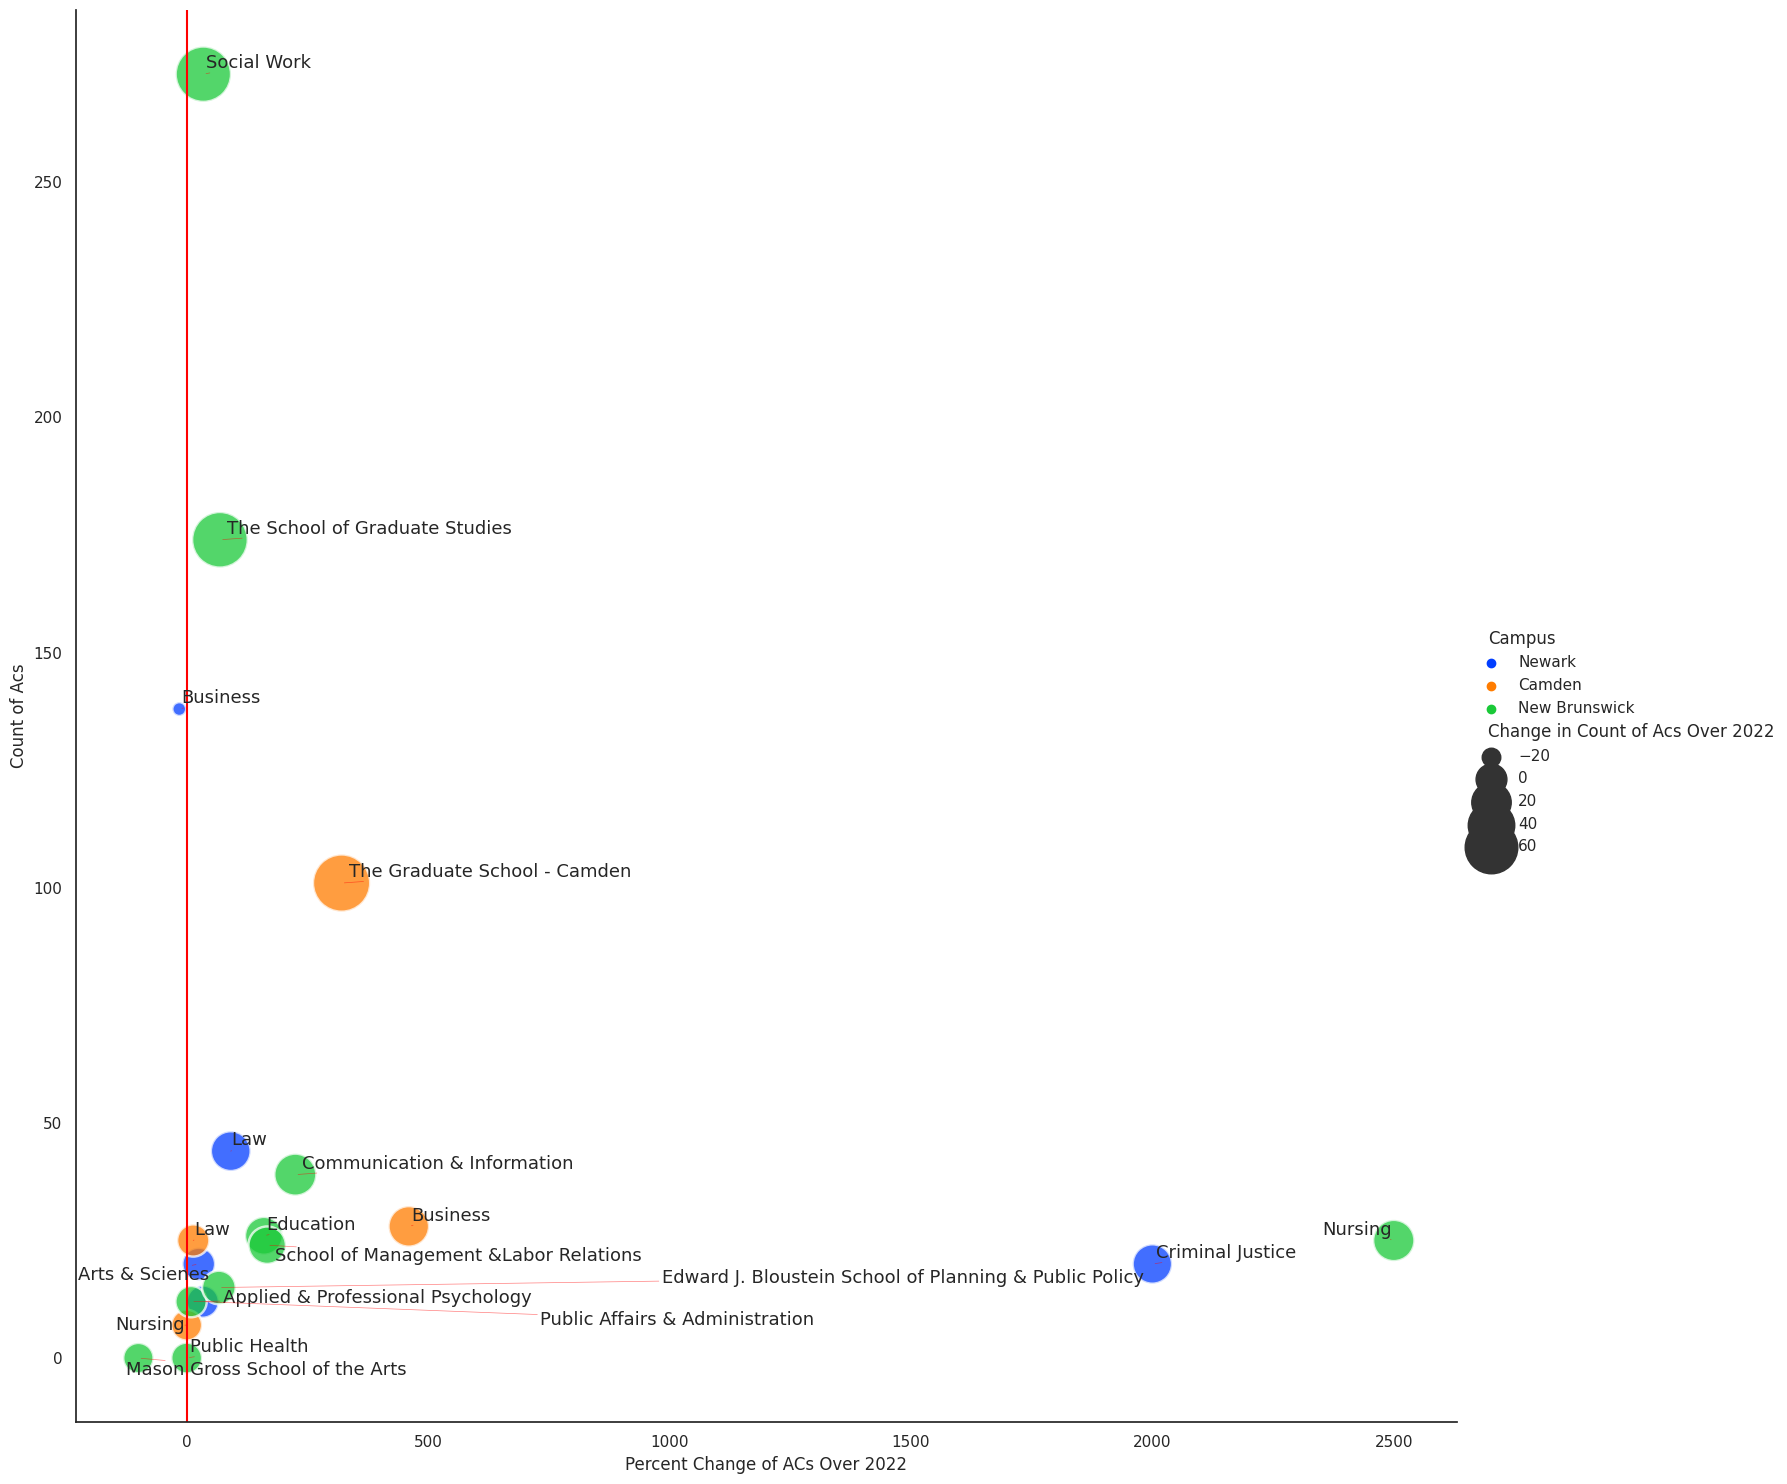

In [15]:
from numpy.ma.core import compress
import seaborn as sns
sns.set_theme(style="white")
# Plot miles

sns.relplot(y="Count of Acs", x="Percent Change of ACs Over 2022", 
            hue="Campus", size="Change in Count of Acs Over 2022",
            sizes=(100, 1700), alpha=.75,palette="bright",
            height=15, data=campcomps)
plt.axvline(x = 0, color = 'red',)

texts = [plt.text(campcomps['Percent Change of ACs Over 2022'][i],
                  campcomps['Count of Acs'][i], campcomps['School'][i],fontsize=13) 
for i in range(len(campcomps))] 
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5));

### Who Applied: Age by Program

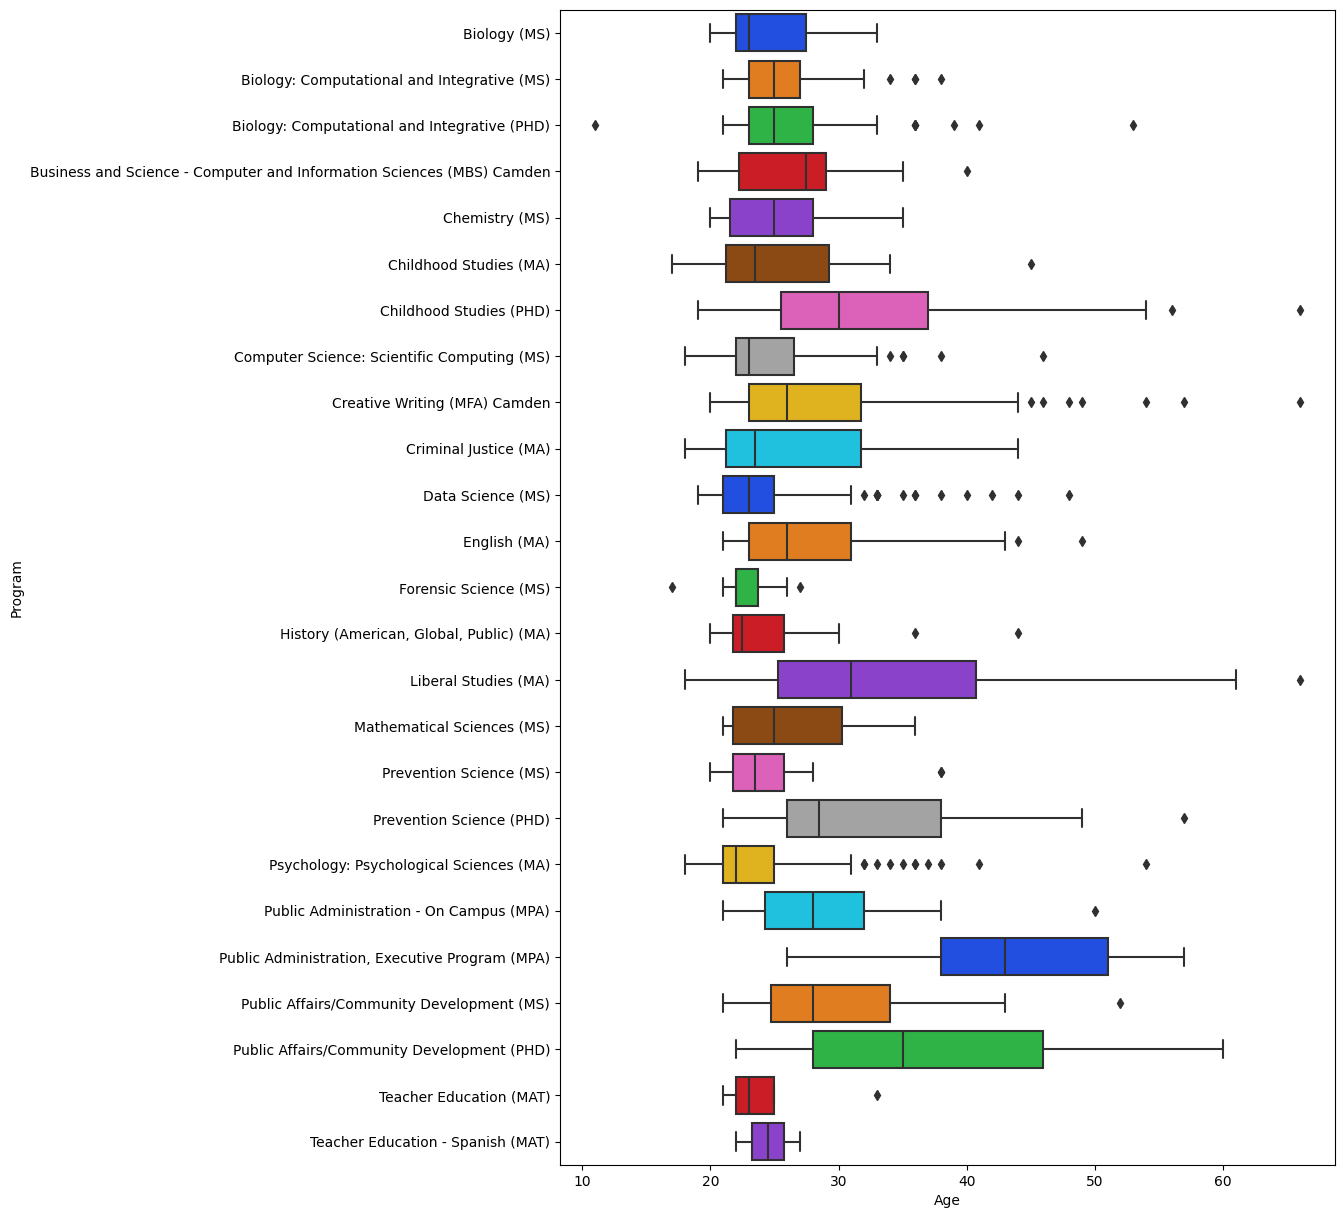

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))

import seaborn as sns
sns.set_theme(style="whitegrid")

my_order = fall.groupby(by=["Program"])["Age"].median('Age').iloc[::1].index
 
sns.boxplot(x='Age', y='Program', palette="bright", data=fall, order=my_order);

0 Gender
Female    0.545455
Male      0.454545
Name: 0, dtype: float64


Text(0.2727272727272727, 0, '54 %')

Text(0.7727272727272727, 0, '45 %')

1 Gender
Female    0.56
Male      0.44
Name: 1, dtype: float64


Text(0.28, 1, '56 %')

Text(0.78, 1, '44 %')

2 Gender
Female    0.452055
Male      0.547945
Name: 2, dtype: float64


Text(0.22602739726027396, 2, '45 %')

Text(0.726027397260274, 2, '54 %')

3 Gender
Female    0.428571
Male      0.571429
Name: 3, dtype: float64


Text(0.21428571428571427, 3, '42 %')

Text(0.7142857142857142, 3, '57 %')

4 Gender
Female    0.466667
Male      0.533333
Name: 4, dtype: float64


Text(0.23333333333333334, 4, '46 %')

Text(0.7333333333333334, 4, '53 %')

5 Gender
Female    0.857143
Male      0.142857
Name: 5, dtype: float64


Text(0.42857142857142855, 5, '85 %')

Text(0.9285714285714285, 5, '14 %')

6 Gender
Female    0.846154
Male      0.153846
Name: 6, dtype: float64


Text(0.4230769230769231, 6, '84 %')

Text(0.9230769230769231, 6, '15 %')

7 Gender
Female    0.362637
Male      0.637363
Name: 7, dtype: float64


Text(0.1813186813186813, 7, '36 %')

Text(0.6813186813186813, 7, '63 %')

8 Gender
Female    0.644928
Male      0.355072
Name: 8, dtype: float64


Text(0.322463768115942, 8, '64 %')

Text(0.822463768115942, 8, '35 %')

9 Gender
Female    0.538462
Male      0.461538
Name: 9, dtype: float64


Text(0.2692307692307692, 9, '53 %')

Text(0.7692307692307692, 9, '46 %')

10 Gender
Female    0.311295
Male      0.688705
Name: 10, dtype: float64


Text(0.15564738292011018, 10, '31 %')

Text(0.6556473829201102, 10, '68 %')

11 Gender
Female    0.432432
Male      0.567568
Name: 11, dtype: float64


Text(0.21621621621621623, 11, '43 %')

Text(0.7162162162162162, 11, '56 %')

12 Gender
Female    0.681818
Male      0.318182
Name: 12, dtype: float64


Text(0.3409090909090909, 12, '68 %')

Text(0.8409090909090908, 12, '31 %')

13 Gender
Female    0.75
Male      0.25
Name: 13, dtype: float64


Text(0.375, 13, '75 %')

Text(0.875, 13, '25 %')

14 Gender
Female    0.785714
Male      0.214286
Name: 14, dtype: float64


Text(0.39285714285714285, 14, '78 %')

Text(0.8928571428571428, 14, '21 %')

15 Gender
Female    0.5
Male      0.5
Name: 15, dtype: float64


Text(0.25, 15, '50 %')

Text(0.75, 15, '50 %')

16 Gender
Female    0.916667
Male      0.083333
Name: 16, dtype: float64


Text(0.4583333333333333, 16, '91 %')

17 Gender
Female    0.73913
Male      0.26087
Name: 17, dtype: float64


Text(0.3695652173913043, 17, '73 %')

Text(0.8695652173913043, 17, '26 %')

18 Gender
Female    0.80315
Male      0.19685
Name: 18, dtype: float64


Text(0.4015748031496063, 18, '80 %')

Text(0.9015748031496064, 18, '19 %')

19 Gender
Female    0.433333
Male      0.566667
Name: 19, dtype: float64


Text(0.21666666666666667, 19, '43 %')

Text(0.7166666666666667, 19, '56 %')

20 Gender
Female    0.461538
Male      0.538462
Name: 20, dtype: float64


Text(0.23076923076923078, 20, '46 %')

Text(0.7307692307692308, 20, '53 %')

21 Gender
Female    0.583333
Male      0.416667
Name: 21, dtype: float64


Text(0.2916666666666667, 21, '58 %')

Text(0.7916666666666667, 21, '41 %')

22 Gender
Female    0.666667
Male      0.333333
Name: 22, dtype: float64


Text(0.3333333333333333, 22, '66 %')

Text(0.8333333333333333, 22, '33 %')

23 Gender
Female    0.625
Male      0.375
Name: 23, dtype: float64


Text(0.3125, 23, '62 %')

Text(0.8125, 23, '37 %')

24 Gender
Female    1.0
Male      NaN
Name: 24, dtype: float64


Text(0.5, 24, '100 %')

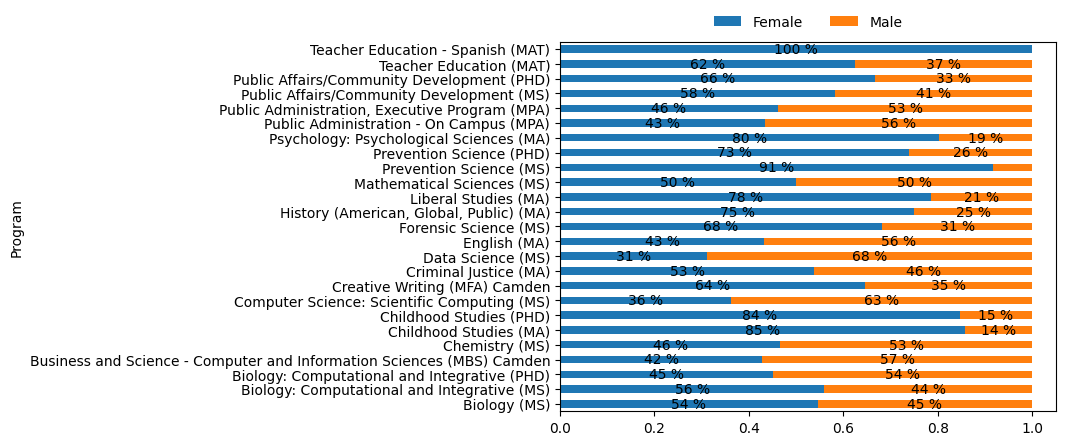

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

_var, y_var = "Program", "Gender"
fall_grouped = fall.groupby("Program")["Gender"].value_counts(normalize=True).unstack(y_var)
fall_grouped.plot.barh(stacked=True).figsize=(20,20)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
for ix, row in fall_grouped.reset_index(drop=True).iterrows():
        print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element;

<AxesSubplot:>

Text(0, 0.5, 'Number of Applicants')

Text(0.5, 0, 'Country')

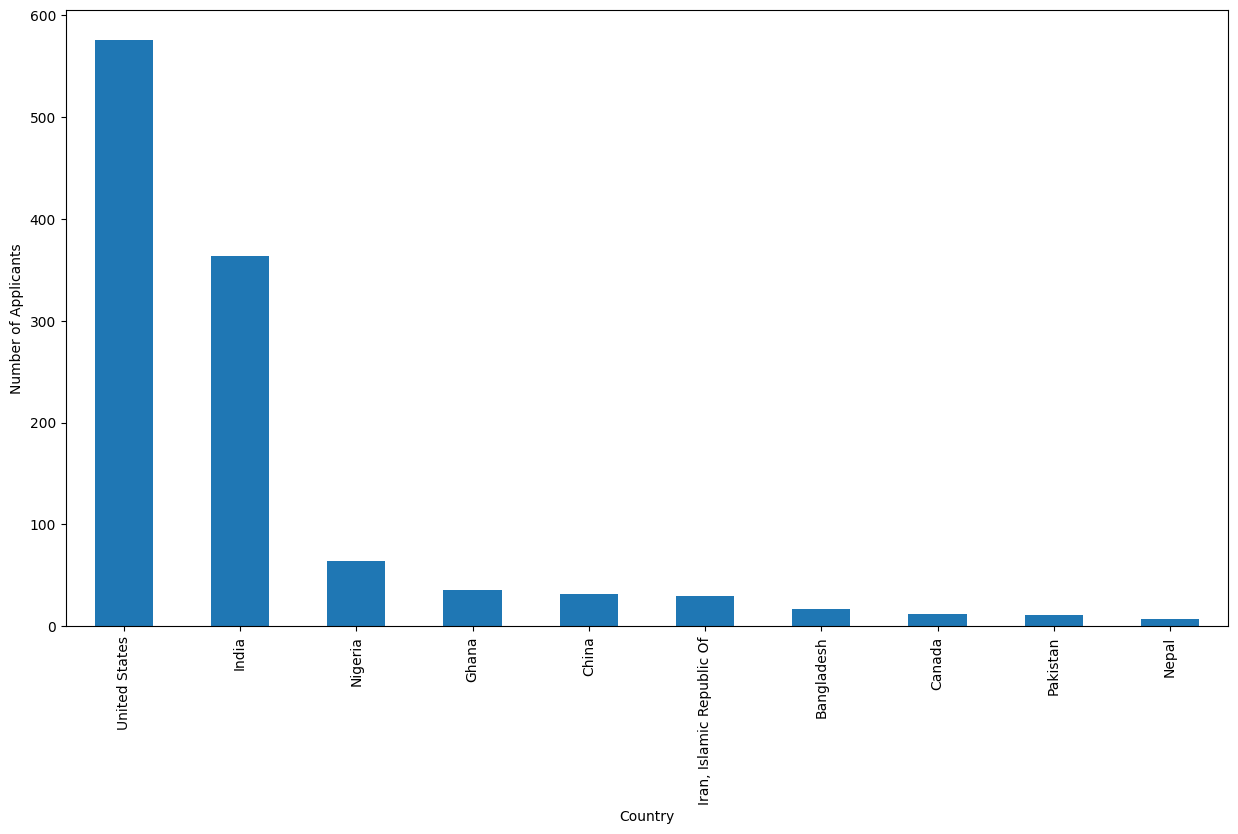

In [ ]:
fall.Country.value_counts().nlargest(10).plot(kind='bar',figsize=(15,8))
plt.ylabel("Number of Applicants")
plt.xlabel("Country")

<AxesSubplot:>

Text(0, 0.5, 'Number of Applicants')

Text(0.5, 0, 'State')

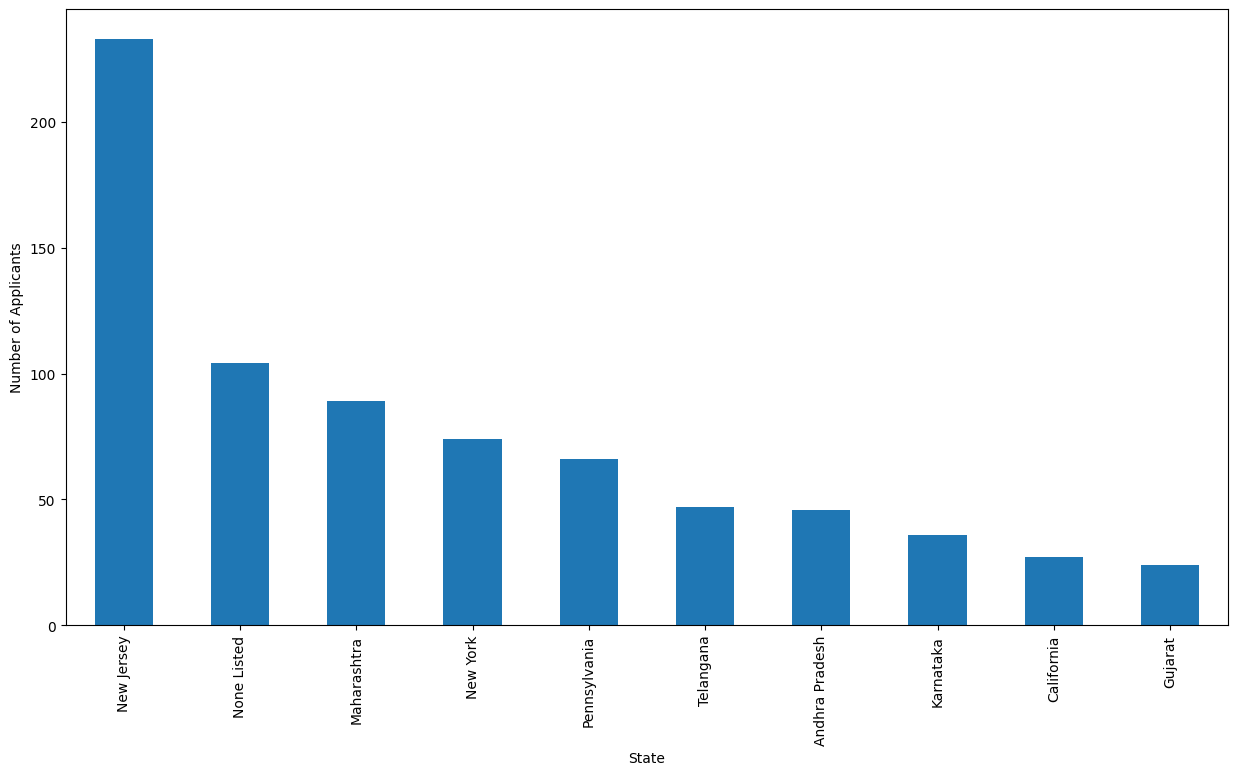

In [ ]:
fall.State.value_counts().nlargest(10).plot(kind='bar',figsize=(15,8))
plt.ylabel("Number of Applicants")
plt.xlabel("State")